In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('260_2023.csv')

In [6]:
df.columns

Index(['State', 'Facility Name', 'Facility ID', 'Unit ID', 'Associated Stacks',
       'Date', 'Hour', 'Operating Time', 'Gross Load (MW)',
       'Steam Load (1000 lb/hr)', 'SO2 Mass (lbs)',
       'SO2 Mass Measure Indicator', 'SO2 Rate (lbs/mmBtu)',
       'SO2 Rate Measure Indicator', 'CO2 Mass (short tons)',
       'CO2 Mass Measure Indicator', 'CO2 Rate (short tons/mmBtu)',
       'CO2 Rate Measure Indicator', 'NOx Mass (lbs)',
       'NOx Mass Measure Indicator', 'NOx Rate (lbs/mmBtu)',
       'NOx Rate Measure Indicator', 'Heat Input (mmBtu)',
       'Heat Input Measure Indicator', 'Primary Fuel Type',
       'Secondary Fuel Type', 'Unit Type', 'SO2 Controls', 'NOx Controls',
       'PM Controls', 'Hg Controls', 'Program Code'],
      dtype='object')

In [5]:
df['Unit ID'].unique()

array(['1A', '2A', '3A', '4A'], dtype=object)

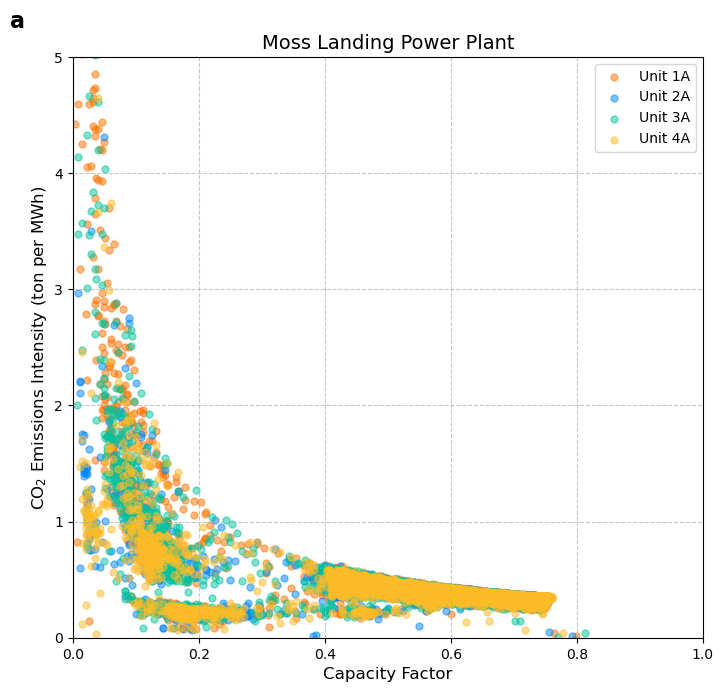

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

# Calculate capacity factor and emissions intensity
nameplate_capacity = 349.5  # MW for all units

# Calculate capacity factor
df['Capacity Factor'] = df['Gross Load (MW)'] / nameplate_capacity

# Convert CO2 mass from short tons to metric tons (1 short ton = 0.907185 metric tons)
df['CO2 Mass (metric tons)'] = df['CO2 Mass (short tons)'] * 0.907185

# Calculate emissions intensity (tons CO2 per MWh)
df['CO2 Emissions Intensity (ton per MWh)'] = df['CO2 Mass (metric tons)'] / df['Gross Load (MW)']

# Create figure with GridSpec for subplots
fig = plt.figure(figsize=(15, 7))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])

# Plot a: Emissions Intensity vs Capacity Factor
ax1 = plt.subplot(gs[0, 0])

# Define colors for each unit
colors = ['#ff7300', '#0088FE', '#00C49F', '#FFBB28']
units = df['Unit ID'].unique()

# Create scatter plot for each unit
for i, unit in enumerate(units):
    unit_data = df[df['Unit ID'] == unit]
    ax1.scatter(
        unit_data['Capacity Factor'], 
        unit_data['CO2 Emissions Intensity (ton per MWh)'],
        s=25,  # marker size
        c=[colors[i]],  # color
        alpha=0.5,  # transparency
        label=f'Unit {unit}'
    )

# Set labels and title
ax1.set_xlabel('Capacity Factor', fontsize=12)
ax1.set_ylabel('CO$_2$ Emissions Intensity (ton per MWh)', fontsize=12)
ax1.set_title('Moss Landing Power Plant', fontsize=14)

# Add grid
ax1.grid(True, linestyle='--', alpha=0.7)

# Add legend
ax1.legend(loc='upper right')

# Set axis limits based on data
cap_factor_min = 0
cap_factor_max = 1
ei_min = 0
ei_max = 5

ax1.set_xlim(cap_factor_min, cap_factor_max)
ax1.set_ylim(ei_min, ei_max)

# Plot b: Reserved for future use (blank subplot)
ax2 = plt.subplot(gs[0, 1])
ax2.set_visible(False)  # Hide the subplot for now

# Add panel labels
ax1.text(-0.1, 1.05, 'a', transform=ax1.transAxes, fontsize=16, fontweight='bold')
ax2.text(-0.1, 1.05, 'b', transform=ax2.transAxes, fontsize=16, fontweight='bold')

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(wspace=0.25)

plt.show()

In [8]:
df_1 = pd.read_csv('260_2023_v2.csv')
df_2 = pd.read_csv('6194_2023.csv')

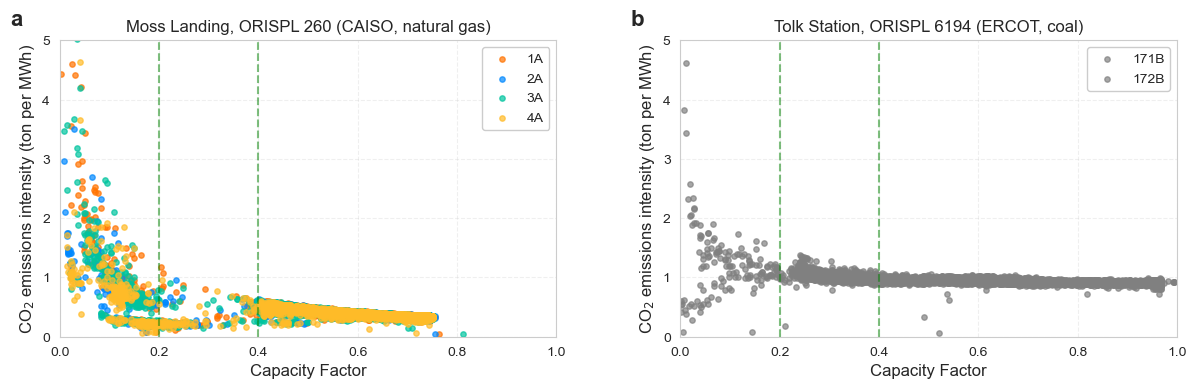

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'

# Define nameplate capacities (different for each plant)
nameplate_capacity_1 = 349.5  # MW for Moss Landing
nameplate_capacity_2 = 567.9  

# Process first dataframe (df_1)
def process_df(df, nameplate_capacity):
    """Process dataframe to calculate capacity factor and emissions intensity"""
    # Make a copy to avoid modifying the original
    processed_df = df.copy()
    
    # Calculate capacity factor
    processed_df['Capacity Factor'] = processed_df['Gross Load (MW)'] / nameplate_capacity
    
    # Convert CO2 mass from short tons to metric tons (1 short ton = 0.907185 metric tons)
    processed_df['CO2 Mass (metric tons)'] = processed_df['CO2 Mass (short tons)'] * 0.907185
    
    # Calculate emissions intensity (tons CO2 per MWh)
    # Avoid division by zero
    mask = processed_df['Gross Load (MW)'] > 0
    processed_df.loc[mask, 'CO2 Emissions Intensity (ton per MWh)'] = (
        processed_df.loc[mask, 'CO2 Mass (metric tons)'] / processed_df.loc[mask, 'Gross Load (MW)']
    )
    
    # Filter out invalid values
    processed_df = processed_df[
        (processed_df['Capacity Factor'] > 0) & 
        (processed_df['CO2 Emissions Intensity (ton per MWh)'] > 0)
    ]
    
    return processed_df

# Process both dataframes
df_1_processed = process_df(df_1, nameplate_capacity_1)
df_2_processed = process_df(df_2, nameplate_capacity_2)

# Create figure with GridSpec for subplots
fig = plt.figure(figsize=(12, 4))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])

# Define colors for each unit (using the exact colors you specified)
colors = {
    '1A': '#ff7300',  # Orange
    '2A': '#0088FE',  # Blue
    '3A': '#00C49F',  # Green
    '4A': '#FFBB28'   # Yellow
}

# Plot a: Moss Landing Plant (df_1)
ax1 = plt.subplot(gs[0, 0])
units_1 = df_1_processed['Unit ID'].unique()

for unit in units_1:
    unit_data = df_1_processed[df_1_processed['Unit ID'] == unit]
    ax1.scatter(
        unit_data['Capacity Factor'], 
        unit_data['CO2 Emissions Intensity (ton per MWh)'],
        s=15,  # smaller marker size
        c=colors[unit],  # color from the defined palette
        alpha=0.7,  # transparency
        label=f'{unit}'
    )

# Set labels and title for first plot
ax1.set_xlabel('Capacity Factor', fontsize=12)
ax1.set_ylabel('CO$_2$ emissions intensity (ton per MWh)', fontsize=12)
ax1.set_title('Moss Landing, ORISPL 260 (CAISO, natural gas)', fontsize=12)

# Add grid for first plot
ax1.grid(True, linestyle='--', alpha=0.3)

# Add dashed vertical lines as shown in the example
ax1.axvline(x=0.2, color='green', linestyle='--', alpha=0.5)
ax1.axvline(x=0.4, color='green', linestyle='--', alpha=0.5)

# Add legend for first plot (position as in the example)
ax1.legend(loc='upper right', framealpha=1)

# Set axis limits for first plot
ax1.set_xlim(0, 1.0)
ax1.set_ylim(0, 5.0)

# Plot b: Second Plant (df_2)
ax2 = plt.subplot(gs[0, 1])
units_2 = df_2_processed['Unit ID'].unique()

for unit in units_2:
    if unit in colors:  # Use predefined colors if unit ID matches
        color = colors[unit]
    else:
        # Assign a default color if unit is not in the predefined color map
        color = 'gray'
        
    unit_data = df_2_processed[df_2_processed['Unit ID'] == unit]
    ax2.scatter(
        unit_data['Capacity Factor'], 
        unit_data['CO2 Emissions Intensity (ton per MWh)'],
        s=15,  # smaller marker size
        c=color,  # color
        alpha=0.7,  # transparency
        label=f'{unit}'
    )

# Set labels and title for second plot
ax2.set_xlabel('Capacity Factor', fontsize=12)
ax2.set_ylabel('CO$_2$ emissions intensity (ton per MWh)', fontsize=12)
ax2.set_title('Tolk Station, ORISPL 6194 (ERCOT, coal)', fontsize=12)  

# Add grid for second plot
ax2.grid(True, linestyle='--', alpha=0.3)

# Add dashed vertical lines as shown in the example
ax2.axvline(x=0.2, color='green', linestyle='--', alpha=0.5)
ax2.axvline(x=0.4, color='green', linestyle='--', alpha=0.5)

# Add legend for second plot
ax2.legend(loc='upper right', framealpha=1)

# Set axis limits for second plot
ax2.set_xlim(0, 1.0)
ax2.set_ylim(0, 5.0)  # Use the same y-limit as first plot for comparison

# Add panel labels
ax1.text(-0.1, 1.05, 'a', transform=ax1.transAxes, fontsize=16, fontweight='bold')
ax2.text(-0.1, 1.05, 'b', transform=ax2.transAxes, fontsize=16, fontweight='bold')

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(wspace=0.25)

# Save figure
plt.savefig('emissions_capacity_two_plants.pdf', bbox_inches='tight', dpi=300)
plt.savefig('emissions_capacity_two_plants.png', bbox_inches='tight', dpi=300)

# Show plot
plt.show()

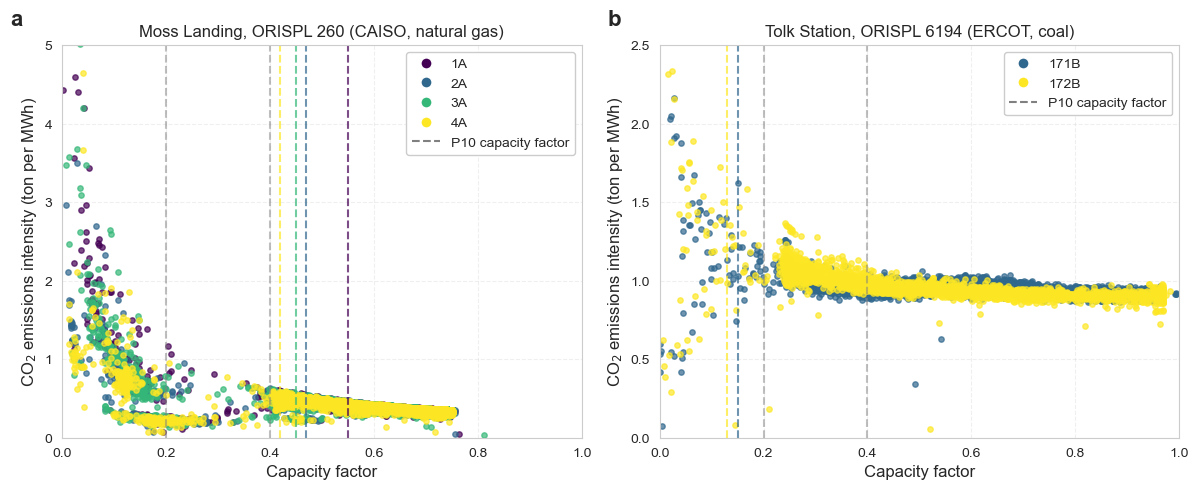

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from matplotlib.cm import viridis
from matplotlib.lines import Line2D

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'

# Define nameplate capacities (different for each plant)
nameplate_capacity_1 = 349.5  # MW for Moss Landing
nameplate_capacity_2 = 567.9  # MW for Tolk Station

# Process first dataframe (df_1)
def process_df(df, nameplate_capacity):
    """Process dataframe to calculate capacity factor and emissions intensity"""
    # Make a copy to avoid modifying the original
    processed_df = df.copy()
    
    # Calculate capacity factor
    processed_df['Capacity Factor'] = processed_df['Gross Load (MW)'] / nameplate_capacity
    
    # Convert CO2 mass from short tons to metric tons (1 short ton = 0.907185 metric tons)
    processed_df['CO2 Mass (metric tons)'] = processed_df['CO2 Mass (short tons)'] * 0.907185
    
    # Calculate emissions intensity (tons CO2 per MWh)
    # Avoid division by zero
    mask = processed_df['Gross Load (MW)'] > 0
    processed_df.loc[mask, 'CO2 Emissions Intensity (ton per MWh)'] = (
        processed_df.loc[mask, 'CO2 Mass (metric tons)'] / processed_df.loc[mask, 'Gross Load (MW)']
    )
    
    # Filter out invalid values
    processed_df = processed_df[
        (processed_df['Capacity Factor'] > 0) & 
        (processed_df['CO2 Emissions Intensity (ton per MWh)'] > 0)
    ]
    
    return processed_df

# Process both dataframes
df_1_processed = process_df(df_1, nameplate_capacity_1)
df_2_processed = process_df(df_2, nameplate_capacity_2)

# Get viridis colors for the units
viridis_colors = [
    '#440154',  # Purple (dark)
    '#30678D',  # Blue
    '#35B778',  # Green
    '#FDE724'   # Yellow (light)
]

# Create figure with GridSpec for subplots
fig = plt.figure(figsize=(12, 5))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])

# Define colors for each unit using viridis
colors = {
    '1A': viridis_colors[0],
    '2A': viridis_colors[1],
    '3A': viridis_colors[2],
    '4A': viridis_colors[3]
}

# Calculate P10 capacity factors for each unit in df_1
p10_capacity_factors_1 = {}
for unit in df_1_processed['Unit ID'].unique():
    unit_data = df_1_processed[df_1_processed['Unit ID'] == unit]
    if len(unit_data) > 0:
        p10_capacity_factors_1[unit] = np.percentile(unit_data['Capacity Factor'], 10)

# Calculate P10 capacity factors for each unit in df_2
p10_capacity_factors_2 = {}
for unit in df_2_processed['Unit ID'].unique():
    unit_data = df_2_processed[df_2_processed['Unit ID'] == unit]
    if len(unit_data) > 0:
        p10_capacity_factors_2[unit] = np.percentile(unit_data['Capacity Factor'], 10)

# Plot a: Moss Landing Plant (df_1)
ax1 = plt.subplot(gs[0, 0])
units_1 = df_1_processed['Unit ID'].unique()

for unit in units_1:
    unit_data = df_1_processed[df_1_processed['Unit ID'] == unit]
    ax1.scatter(
        unit_data['Capacity Factor'], 
        unit_data['CO2 Emissions Intensity (ton per MWh)'],
        s=15,  # smaller marker size
        c=colors[unit],  # color from viridis
        alpha=0.7,  # transparency
        label=f'{unit}'
    )
    # Will handle P10 lines separately later

# Set labels and title for first plot
ax1.set_xlabel('Capacity factor', fontsize=12)
ax1.set_ylabel('CO$_2$ emissions intensity (ton per MWh)', fontsize=12)
ax1.set_title('Moss Landing, ORISPL 260 (CAISO, natural gas)', fontsize=12)

# Add grid for first plot
ax1.grid(True, linestyle='--', alpha=0.3)

# Add dashed vertical lines at 0.2 and 0.4
ax1.axvline(x=0.2, color='gray', linestyle='--', alpha=0.5)
ax1.axvline(x=0.4, color='gray', linestyle='--', alpha=0.5)

# Add specific P10 capacity factor lines as shown in the example
p10_positions = {
    '1A': 0.55,  # Purple unit
    '2A': 0.47,  # Blue unit
    '3A': 0.45,  # Green unit
    '4A': 0.42   # Yellow unit
}

for unit, position in p10_positions.items():
    ax1.axvline(x=position, color=colors[unit], linestyle='--', alpha=0.7)

# Create custom legend handles
legend_handles = []
for unit in units_1:
    # Add scatter point
    legend_handles.append(Line2D([0], [0], marker='o', color='w', 
                          markerfacecolor=colors[unit], markersize=8, label=unit))

# Add P10 capacity factor to legend
legend_handles.append(Line2D([0], [0], color='gray', linestyle='--', label='P10 capacity factor'))

# Add legend with custom handles
ax1.legend(handles=legend_handles, loc='upper right', framealpha=1)

# Set axis limits for first plot
ax1.set_xlim(0, 1.0)
ax1.set_ylim(0, 5.0)

# Plot b: Tolk Station (df_2)
ax2 = plt.subplot(gs[0, 1])

# Define the specific unit IDs for Tolk Station as shown in the example
units_2 = ['171B', '172B']

# Use blue and yellow from viridis for Tolk Station instead of purple and blue
ercot_unit_colors = {
    '171B': viridis_colors[1],  # Blue
    '172B': viridis_colors[3]   # Yellow
}

for unit in units_2:
    # Filter data for this specific unit
    unit_data = df_2_processed[df_2_processed['Unit ID'] == unit]
    
    ax2.scatter(
        unit_data['Capacity Factor'], 
        unit_data['CO2 Emissions Intensity (ton per MWh)'],
        s=15,  # smaller marker size
        c=ercot_unit_colors[unit],  # Get color from the mapping
        alpha=0.7,  # transparency
        label=f'{unit}'
    )

# Set labels and title for second plot
ax2.set_xlabel('Capacity factor', fontsize=12)
ax2.set_ylabel('CO$_2$ emissions intensity (ton per MWh)', fontsize=12)
ax2.set_title('Tolk Station, ORISPL 6194 (ERCOT, coal)', fontsize=12)

# Add grid for second plot
ax2.grid(True, linestyle='--', alpha=0.3)

# Add dashed vertical lines at 0.2 and 0.4
ax2.axvline(x=0.2, color='gray', linestyle='--', alpha=0.5)
ax2.axvline(x=0.4, color='gray', linestyle='--', alpha=0.5)

# Add specific P10 capacity factor lines for ERCOT plot
ercot_p10_positions = {
    '171B': 0.15,  # Blue unit
    '172B': 0.13   # Yellow unit
}

for unit, position in ercot_p10_positions.items():
    ax2.axvline(x=position, color=ercot_unit_colors[unit], linestyle='--', alpha=0.7)

# Create custom legend handles for ERCOT plot
legend_handles_2 = []
for unit in units_2:
    # Add scatter point
    legend_handles_2.append(Line2D([0], [0], marker='o', color='w', 
                            markerfacecolor=ercot_unit_colors[unit], markersize=8, label=unit))

# Add P10 capacity factor to legend
legend_handles_2.append(Line2D([0], [0], color='gray', linestyle='--', label='P10 capacity factor'))

# Add legend with custom handles
ax2.legend(handles=legend_handles_2, loc='upper right', framealpha=1)

# Set axis limits for second plot
ax2.set_xlim(0, 1.0)
ax2.set_ylim(0, 2.5)  # Lower y-limit for the coal plant plot

# Add panel labels
ax1.text(-0.1, 1.05, 'a', transform=ax1.transAxes, fontsize=16, fontweight='bold')
ax2.text(-0.1, 1.05, 'b', transform=ax2.transAxes, fontsize=16, fontweight='bold')

# Adjust layout with reduced spacing between subplots
plt.tight_layout()
plt.subplots_adjust(wspace=0.15)  # Reduced from 0.3 to 0.15

# Save figure
plt.savefig('emissions_capacity_viridis.pdf', bbox_inches='tight', dpi=300)
plt.savefig('emissions_capacity_viridis.png', bbox_inches='tight', dpi=300)

# Show plot
plt.show()

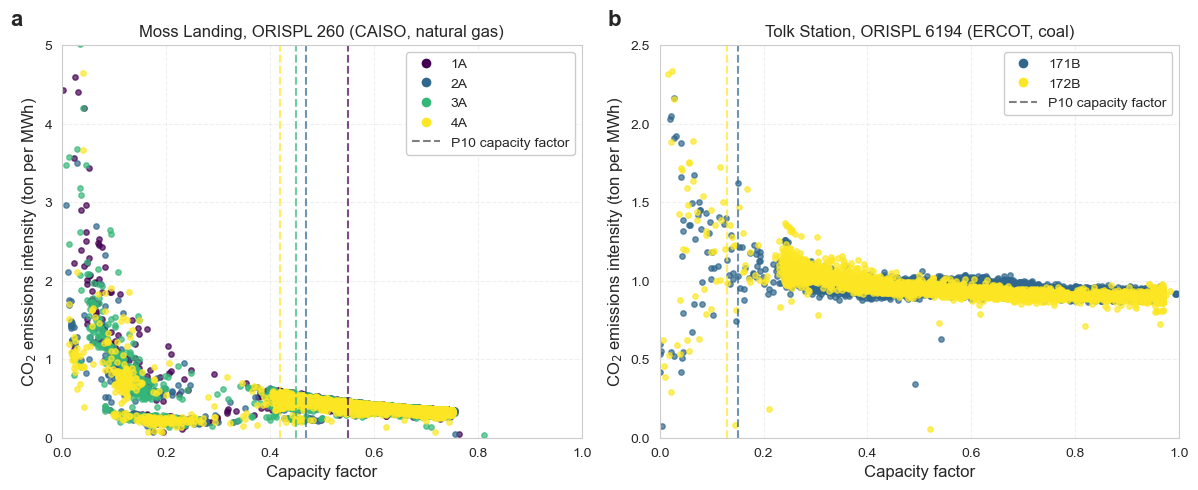

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from matplotlib.cm import viridis
from matplotlib.lines import Line2D

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'

# Define nameplate capacities (different for each plant)
nameplate_capacity_1 = 349.5  # MW for Moss Landing
nameplate_capacity_2 = 567.9  # MW for Tolk Station

# Process first dataframe (df_1)
def process_df(df, nameplate_capacity):
    """Process dataframe to calculate capacity factor and emissions intensity"""
    # Make a copy to avoid modifying the original
    processed_df = df.copy()
    
    # Calculate capacity factor
    processed_df['Capacity Factor'] = processed_df['Gross Load (MW)'] / nameplate_capacity
    
    # Convert CO2 mass from short tons to metric tons (1 short ton = 0.907185 metric tons)
    processed_df['CO2 Mass (metric tons)'] = processed_df['CO2 Mass (short tons)'] * 0.907185
    
    # Calculate emissions intensity (tons CO2 per MWh)
    # Avoid division by zero
    mask = processed_df['Gross Load (MW)'] > 0
    processed_df.loc[mask, 'CO2 Emissions Intensity (ton per MWh)'] = (
        processed_df.loc[mask, 'CO2 Mass (metric tons)'] / processed_df.loc[mask, 'Gross Load (MW)']
    )
    
    # Filter out invalid values
    processed_df = processed_df[
        (processed_df['Capacity Factor'] > 0) & 
        (processed_df['CO2 Emissions Intensity (ton per MWh)'] > 0)
    ]
    
    return processed_df

# Process both dataframes
df_1_processed = process_df(df_1, nameplate_capacity_1)
df_2_processed = process_df(df_2, nameplate_capacity_2)

# Get viridis colors for the units
viridis_colors = [
    '#440154',  # Purple (dark)
    '#30678D',  # Blue
    '#35B778',  # Green
    '#FDE724'   # Yellow (light)
]

# Create figure with GridSpec for subplots
fig = plt.figure(figsize=(12, 5))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])

# Define colors for each unit using viridis
colors = {
    '1A': viridis_colors[0],
    '2A': viridis_colors[1],
    '3A': viridis_colors[2],
    '4A': viridis_colors[3]
}

# Comment out the automatic P10 calculation since we're using manually specified values
# Calculate P10 capacity factors for each unit in df_1
# p10_capacity_factors_1 = {}
# for unit in df_1_processed['Unit ID'].unique():
#     unit_data = df_1_processed[df_1_processed['Unit ID'] == unit]
#     if len(unit_data) > 0:
#         p10_capacity_factors_1[unit] = np.percentile(unit_data['Capacity Factor'], 10)

# Calculate P10 capacity factors for each unit in df_2
# p10_capacity_factors_2 = {}
# for unit in df_2_processed['Unit ID'].unique():
#     unit_data = df_2_processed[df_2_processed['Unit ID'] == unit]
#     if len(unit_data) > 0:
#         p10_capacity_factors_2[unit] = np.percentile(unit_data['Capacity Factor'], 10)

# Plot a: Moss Landing Plant (df_1)
ax1 = plt.subplot(gs[0, 0])
units_1 = df_1_processed['Unit ID'].unique()

for unit in units_1:
    unit_data = df_1_processed[df_1_processed['Unit ID'] == unit]
    ax1.scatter(
        unit_data['Capacity Factor'], 
        unit_data['CO2 Emissions Intensity (ton per MWh)'],
        s=15,  # smaller marker size
        c=colors[unit],  # color from viridis
        alpha=0.7,  # transparency
        label=f'{unit}'
    )
    # Will handle P10 lines separately later

# Set labels and title for first plot
ax1.set_xlabel('Capacity factor', fontsize=12)
ax1.set_ylabel('CO$_2$ emissions intensity (ton per MWh)', fontsize=12)
ax1.set_title('Moss Landing, ORISPL 260 (CAISO, natural gas)', fontsize=12)

# Add grid for first plot
ax1.grid(True, linestyle='--', alpha=0.3)

# Add specific P10 capacity factor lines as shown in the example
p10_positions = {
    '1A': 0.55,  # Purple unit
    '2A': 0.47,  # Blue unit
    '3A': 0.45,  # Green unit
    '4A': 0.42   # Yellow unit
}

for unit, position in p10_positions.items():
    ax1.axvline(x=position, color=colors[unit], linestyle='--', alpha=0.7)

# Create custom legend handles
legend_handles = []
for unit in units_1:
    # Add scatter point
    legend_handles.append(Line2D([0], [0], marker='o', color='w', 
                          markerfacecolor=colors[unit], markersize=8, label=unit))

# Add P10 capacity factor to legend
legend_handles.append(Line2D([0], [0], color='gray', linestyle='--', label='P10 capacity factor'))

# Add legend with custom handles
ax1.legend(handles=legend_handles, loc='upper right', framealpha=1)

# Set axis limits for first plot
ax1.set_xlim(0, 1.0)
ax1.set_ylim(0, 5.0)

# Plot b: Tolk Station (df_2)
ax2 = plt.subplot(gs[0, 1])

# Define the specific unit IDs for Tolk Station as shown in the example
units_2 = ['171B', '172B']

# Use blue and yellow from viridis for Tolk Station instead of purple and blue
ercot_unit_colors = {
    '171B': viridis_colors[1],  # Blue
    '172B': viridis_colors[3]   # Yellow
}

for unit in units_2:
    # Filter data for this specific unit
    unit_data = df_2_processed[df_2_processed['Unit ID'] == unit]
    
    ax2.scatter(
        unit_data['Capacity Factor'], 
        unit_data['CO2 Emissions Intensity (ton per MWh)'],
        s=15,  # smaller marker size
        c=ercot_unit_colors[unit],  # Get color from the mapping
        alpha=0.7,  # transparency
        label=f'{unit}'
    )

# Set labels and title for second plot
ax2.set_xlabel('Capacity factor', fontsize=12)
ax2.set_ylabel('CO$_2$ emissions intensity (ton per MWh)', fontsize=12)
ax2.set_title('Tolk Station, ORISPL 6194 (ERCOT, coal)', fontsize=12)

# Add grid for second plot
ax2.grid(True, linestyle='--', alpha=0.3)

# Add specific P10 capacity factor lines for ERCOT plot
ercot_p10_positions = {
    '171B': 0.15,  # Blue unit
    '172B': 0.13   # Yellow unit
}

for unit, position in ercot_p10_positions.items():
    ax2.axvline(x=position, color=ercot_unit_colors[unit], linestyle='--', alpha=0.7)

# Create custom legend handles for ERCOT plot
legend_handles_2 = []
for unit in units_2:
    # Add scatter point
    legend_handles_2.append(Line2D([0], [0], marker='o', color='w', 
                            markerfacecolor=ercot_unit_colors[unit], markersize=8, label=unit))

# Add P10 capacity factor to legend
legend_handles_2.append(Line2D([0], [0], color='gray', linestyle='--', label='P10 capacity factor'))

# Add legend with custom handles
ax2.legend(handles=legend_handles_2, loc='upper right', framealpha=1)

# Set axis limits for second plot
ax2.set_xlim(0, 1.0)
ax2.set_ylim(0, 2.5)  # Lower y-limit for the coal plant plot

# Add panel labels
ax1.text(-0.1, 1.05, 'a', transform=ax1.transAxes, fontsize=16, fontweight='bold')
ax2.text(-0.1, 1.05, 'b', transform=ax2.transAxes, fontsize=16, fontweight='bold')

# Adjust layout with reduced spacing between subplots
plt.tight_layout()
plt.subplots_adjust(wspace=0.15)  # Reduced from 0.3 to 0.15

# Save figure
plt.savefig('emissions_capacity_viridis.pdf', bbox_inches='tight', dpi=300)
plt.savefig('emissions_capacity_viridis.png', bbox_inches='tight', dpi=300)

# Show plot
plt.show()

In [28]:
df_1_processed[df_1_processed['Unit ID']=='1A']['Capacity Factor'].quantile(0.1)

0.4864091559370529

Unit 1A P10 capacity factor: 0.486
Unit 2A P10 capacity factor: 0.501
Unit 3A P10 capacity factor: 0.423
Unit 4A P10 capacity factor: 0.423
Unit 171B P10 capacity factor: 0.243
Unit 172B P10 capacity factor: 0.243


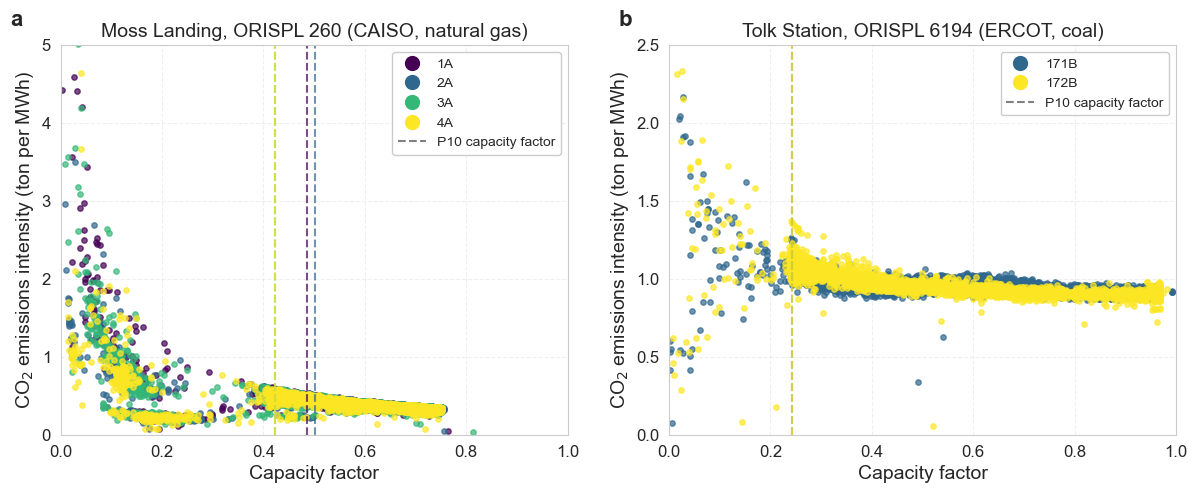

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from matplotlib.cm import viridis
from matplotlib.lines import Line2D

# Define nameplate capacities (different for each plant)
nameplate_capacity_1 = 349.5  # MW for Moss Landing
nameplate_capacity_2 = 567.9  # MW for Tolk Station

# Process first dataframe (df_1)
def process_df(df, nameplate_capacity):
    """Process dataframe to calculate capacity factor and emissions intensity"""
    # Make a copy to avoid modifying the original
    processed_df = df.copy()
    
    # Calculate capacity factor
    processed_df['Capacity Factor'] = processed_df['Gross Load (MW)'] / nameplate_capacity
    
    # Convert CO2 mass from short tons to metric tons (1 short ton = 0.907185 metric tons)
    processed_df['CO2 Mass (metric tons)'] = processed_df['CO2 Mass (short tons)'] * 0.907185
    
    # Calculate emissions intensity (tons CO2 per MWh)
    # Avoid division by zero
    mask = processed_df['Gross Load (MW)'] > 0
    processed_df.loc[mask, 'CO2 Emissions Intensity (ton per MWh)'] = (
        processed_df.loc[mask, 'CO2 Mass (metric tons)'] / processed_df.loc[mask, 'Gross Load (MW)']
    )
    
    # Filter out invalid values
    processed_df = processed_df[
        (processed_df['Capacity Factor'] > 0) & 
        (processed_df['CO2 Emissions Intensity (ton per MWh)'] > 0)
    ]
    
    return processed_df

# Process both dataframes
df_1_processed = process_df(df_1, nameplate_capacity_1)
df_2_processed = process_df(df_2, nameplate_capacity_2)

# Get viridis colors for the units
viridis_colors = [
    '#440154',  # Purple (dark)
    '#30678D',  # Blue
    '#35B778',  # Green
    '#FDE724'   # Yellow (light)
]

# Create figure with GridSpec for subplots
fig = plt.figure(figsize=(12, 5))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])

# Define colors for each unit using viridis
colors = {
    '1A': viridis_colors[0],
    '2A': viridis_colors[1],
    '3A': viridis_colors[2],
    '4A': viridis_colors[3]
}

# Calculate P10 capacity factors for each unit
p10_capacity_factors_1 = {}
for unit in ['1A', '2A', '3A', '4A']:
    # Only calculate if the unit exists in the data
    if unit in df_1_processed['Unit ID'].unique():
        p10 = df_1_processed[df_1_processed['Unit ID'] == unit]['Capacity Factor'].quantile(0.1)
        p10_capacity_factors_1[unit] = p10
        print(f"Unit {unit} P10 capacity factor: {p10:.3f}")

# Calculate P10 for ERCOT units
p10_capacity_factors_2 = {}
for unit in ['171B', '172B']:
    # Only calculate if the unit exists in the data
    if unit in df_2_processed['Unit ID'].unique():
        p10 = df_2_processed[df_2_processed['Unit ID'] == unit]['Capacity Factor'].quantile(0.1)
        p10_capacity_factors_2[unit] = p10
        print(f"Unit {unit} P10 capacity factor: {p10:.3f}")

# Plot a: Moss Landing Plant (df_1)
ax1 = plt.subplot(gs[0, 0])
units_1 = sorted(df_1_processed['Unit ID'].unique())

for unit in units_1:
    unit_data = df_1_processed[df_1_processed['Unit ID'] == unit]
    ax1.scatter(
        unit_data['Capacity Factor'], 
        unit_data['CO2 Emissions Intensity (ton per MWh)'],
        s=15,  # smaller marker size
        c=colors.get(unit, 'gray'),  # color from viridis, fallback to gray if unit not in colors dict
        alpha=0.7,  # transparency
        label=f'{unit}'
    )

# Set labels and title for first plot
ax1.set_xlabel('Capacity factor', fontsize=14)
ax1.set_ylabel('CO$_2$ emissions intensity (ton per MWh)', fontsize=14)
ax1.set_title('Moss Landing, ORISPL 260 (CAISO, natural gas)', fontsize=14)

# Add grid for first plot
ax1.grid(True, linestyle='--', alpha=0.3)

# Don't add reference lines at 0.2 and 0.4
# Instead, add the calculated P10 capacity factor lines for each unit
for unit, p10 in p10_capacity_factors_1.items():
    if unit in colors:
        ax1.axvline(x=p10, color=colors[unit], linestyle='--', alpha=0.7)

# Create custom legend handles
legend_handles = []
for unit in sorted(units_1):
    if unit in colors:
        # Add scatter point
        legend_handles.append(Line2D([0], [0], marker='o', color='w', 
                              markerfacecolor=colors[unit], markersize=12, label=unit))

# Add P10 capacity factor to legend
legend_handles.append(Line2D([0], [0], color='gray', linestyle='--', label='P10 capacity factor'))

# Add legend with custom handles
ax1.legend(handles=legend_handles, loc='upper right', framealpha=1)

# Set axis limits for first plot
ax1.set_xlim(0, 1.0)
ax1.set_ylim(0, 5.0)

# Plot b: Tolk Station (df_2)
ax2 = plt.subplot(gs[0, 1])

# Define the specific unit IDs for Tolk Station
units_2 = sorted(df_2_processed['Unit ID'].unique())
if '171B' not in units_2 and '172B' not in units_2:
    # If the expected units aren't present, use the first two units from the actual data
    units_2 = units_2[:2]
    print(f"Using units {units_2} for ERCOT plot instead of 171B/172B")

# Use blue and yellow from viridis for Tolk Station
ercot_unit_colors = {}
for i, unit in enumerate(units_2):
    if i == 0:
        ercot_unit_colors[unit] = viridis_colors[1]  # Blue for first unit
    else:
        ercot_unit_colors[unit] = viridis_colors[3]  # Yellow for second unit

for unit in units_2:
    # Filter data for this specific unit
    unit_data = df_2_processed[df_2_processed['Unit ID'] == unit]
    
    ax2.scatter(
        unit_data['Capacity Factor'], 
        unit_data['CO2 Emissions Intensity (ton per MWh)'],
        s=15,  # smaller marker size
        c=ercot_unit_colors.get(unit, 'gray'),  # Get color from the mapping
        alpha=0.7,  # transparency
        label=f'{unit}'
    )

# Set labels and title for second plot
ax2.set_xlabel('Capacity factor', fontsize=14)
ax2.set_ylabel('CO$_2$ emissions intensity (ton per MWh)', fontsize=14)
ax2.set_title('Tolk Station, ORISPL 6194 (ERCOT, coal)', fontsize=14)

# Add grid for second plot
ax2.grid(True, linestyle='--', alpha=0.3)

# Don't add reference lines at 0.2 and 0.4
# Instead, add the calculated P10 capacity factor lines for each unit
for unit, p10 in p10_capacity_factors_2.items():
    if unit in ercot_unit_colors:
        ax2.axvline(x=p10, color=ercot_unit_colors[unit], linestyle='--', alpha=0.7)

# Create custom legend handles for ERCOT plot
legend_handles_2 = []
for unit in sorted(units_2):
    if unit in ercot_unit_colors:
        # Add scatter point
        legend_handles_2.append(Line2D([0], [0], marker='o', color='w', 
                                markerfacecolor=ercot_unit_colors[unit], markersize=12, label=unit))

# Add P10 capacity factor to legend
legend_handles_2.append(Line2D([0], [0], color='gray', linestyle='--', label='P10 capacity factor'))

# Add legend with custom handles
ax2.legend(handles=legend_handles_2, loc='upper right', framealpha=1)

# Set axis limits for second plot
ax2.set_xlim(0, 1.0)
ax2.set_ylim(0, 2.5)  # Lower y-limit for the coal plant plot

# Add panel labels
ax1.text(-0.1, 1.05, 'a', transform=ax1.transAxes, fontsize=16, fontweight='bold')
ax2.text(-0.1, 1.05, 'b', transform=ax2.transAxes, fontsize=16, fontweight='bold')

# Adjust layout with reduced spacing between subplots
plt.tight_layout()
plt.subplots_adjust(wspace=0.2)  # Reduced spacing between subplots

ax1.tick_params(axis='both', which='major', labelsize=12)

# Increase tick label size for ax2
ax2.tick_params(axis='both', which='major', labelsize=12)

# Save figure
plt.savefig('emissions_capacity_viridis.pdf', bbox_inches='tight', dpi=300)
plt.savefig('emissions_capacity_viridis.png', bbox_inches='tight', dpi=300)

# Show plot
plt.show()

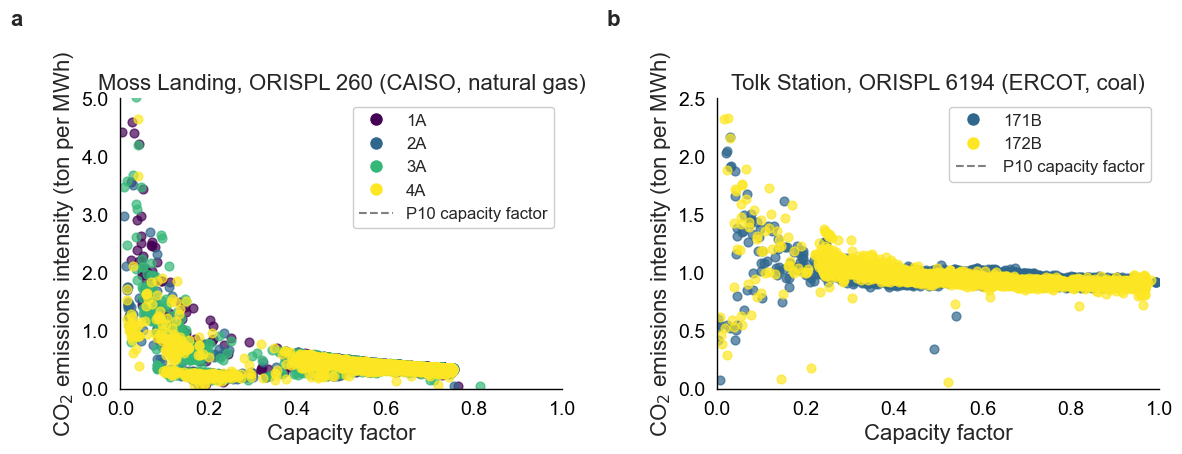

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.ticker as mticker
from matplotlib.cm import viridis
from matplotlib.lines import Line2D

# === Global Styling for Scientific (Nature) Plots ===
plt.rcParams.update({
    'font.size': 14,
    'axes.labelsize': 16,
    'axes.titlesize': 16,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'axes.edgecolor': 'black',
    'axes.linewidth': 1.0,
    'xtick.color': 'black',
    'ytick.color': 'black',
    'xtick.major.size': 5,
    'ytick.major.size': 5,
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial'],
    'grid.alpha': 0.3
})

# Processed data (df_1_processed, df_2_processed assumed to be already prepared)

# Colors
viridis_colors = ['#440154', '#30678D', '#35B778', '#FDE724']
colors = {'1A': viridis_colors[0], '2A': viridis_colors[1], '3A': viridis_colors[2], '4A': viridis_colors[3]}

# Create figure
fig = plt.figure(figsize=(12, 5))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])

# === Plot a: Moss Landing ===
ax1 = plt.subplot(gs[0, 0])
units_1 = sorted(df_1_processed['Unit ID'].unique())

for unit in units_1:
    unit_data = df_1_processed[df_1_processed['Unit ID'] == unit]
    ax1.scatter(unit_data['Capacity Factor'], unit_data['CO2 Emissions Intensity (ton per MWh)'],
                s=40, c=colors.get(unit, 'gray'), alpha=0.7, label=f'{unit}')

ax1.set_xlabel('Capacity factor')
ax1.set_ylabel('CO$_2$ emissions intensity (ton per MWh)')
ax1.set_title('Moss Landing, ORISPL 260 (CAISO, natural gas)')
ax1.set_xlim(0, 1.0)
ax1.set_ylim(0, 5.0)
ax1.grid(False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Force one decimal place on y-axis
ax1.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f'))

# Custom legend with smaller font size
legend_handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[unit],
                          markersize=10, label=unit) for unit in sorted(units_1) if unit in colors]
legend_handles.append(Line2D([0], [0], color='gray', linestyle='--', label='P10 capacity factor'))
ax1.legend(handles=legend_handles, loc='upper right', framealpha=1, fontsize=12)  # Smaller font

# === Plot b: Tolk Station ===
ax2 = plt.subplot(gs[0, 1])
units_2 = sorted(df_2_processed['Unit ID'].unique())
ercot_unit_colors = {units_2[0]: viridis_colors[1], units_2[1]: viridis_colors[3]} if len(units_2) >= 2 else {}

for unit in units_2:
    unit_data = df_2_processed[df_2_processed['Unit ID'] == unit]
    ax2.scatter(unit_data['Capacity Factor'], unit_data['CO2 Emissions Intensity (ton per MWh)'],
                s=40, c=ercot_unit_colors.get(unit, 'gray'), alpha=0.7, label=f'{unit}')

ax2.set_xlabel('Capacity factor')
ax2.set_ylabel('CO$_2$ emissions intensity (ton per MWh)')
ax2.set_title('Tolk Station, ORISPL 6194 (ERCOT, coal)')
ax2.set_xlim(0, 1.0)
ax2.set_ylim(0, 2.5)
ax2.grid(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# Force one decimal place on y-axis
ax2.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f'))

# Custom legend with smaller font size
legend_handles_2 = [Line2D([0], [0], marker='o', color='w', markerfacecolor=ercot_unit_colors[unit],
                            markersize=10, label=unit) for unit in sorted(units_2) if unit in ercot_unit_colors]
legend_handles_2.append(Line2D([0], [0], color='gray', linestyle='--', label='P10 capacity factor'))
ax2.legend(handles=legend_handles_2, loc='upper right', framealpha=1, fontsize=12)  # Smaller font

# === Fix Panel Labels (Move Left/Up Slightly) ===
ax1.text(-0.25, 1.25, 'a', transform=ax1.transAxes, fontsize=16, fontweight='bold')  # Shift left slightly
ax2.text(-0.25, 1.25, 'b', transform=ax2.transAxes, fontsize=16, fontweight='bold')

# Layout adjustments
plt.tight_layout()
plt.subplots_adjust(wspace=0.35)

# Save figures
plt.savefig('emissions_capacity_viridis_fixed.pdf', bbox_inches='tight', dpi=300)
plt.savefig('emissions_capacity_viridis_fixed.png', bbox_inches='tight', dpi=300)

# Show plot
plt.show()


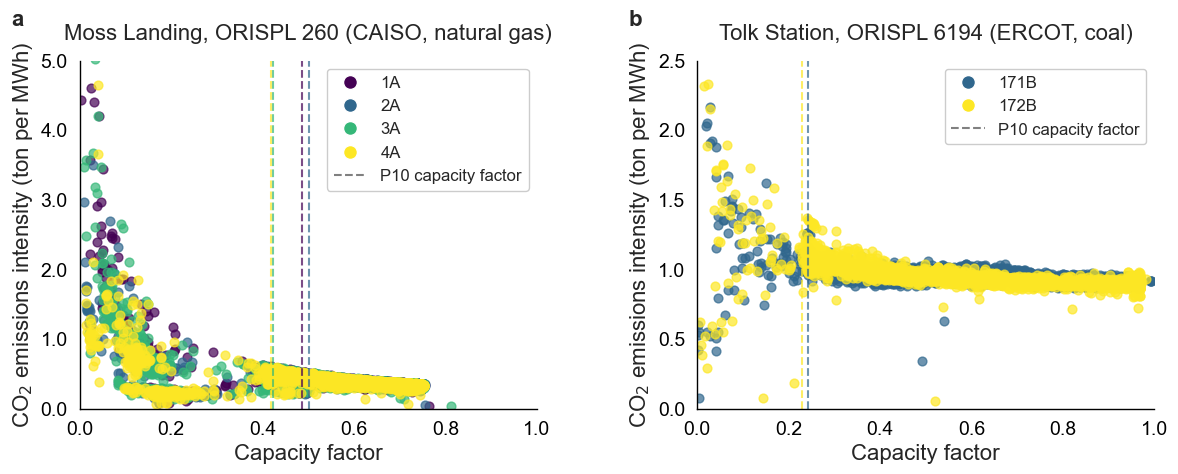

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.ticker as mticker
from matplotlib.cm import viridis
from matplotlib.lines import Line2D

# === Global Styling for Scientific (Nature) Plots ===
plt.rcParams.update({
    'font.size': 14,
    'axes.labelsize': 16,
    'axes.titlesize': 16,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'axes.edgecolor': 'black',
    'axes.linewidth': 1.0,
    'xtick.color': 'black',
    'ytick.color': 'black',
    'xtick.major.size': 5,
    'ytick.major.size': 5,
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial'],
    'grid.alpha': 0.3
})

# Colors
viridis_colors = ['#440154', '#30678D', '#35B778', '#FDE724']
colors = {'1A': viridis_colors[0], '2A': viridis_colors[1], '3A': viridis_colors[2], '4A': viridis_colors[3]}

# Create figure
fig = plt.figure(figsize=(12, 5))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])

# === Plot a: Moss Landing ===
ax1 = plt.subplot(gs[0, 0])
units_1 = sorted(df_1_processed['Unit ID'].unique())

for unit in units_1:
    unit_data = df_1_processed[df_1_processed['Unit ID'] == unit]
    ax1.scatter(unit_data['Capacity Factor'], unit_data['CO2 Emissions Intensity (ton per MWh)'],
                s=40, c=colors.get(unit, 'gray'), alpha=0.7, label=f'{unit}')

ax1.set_xlabel('Capacity factor')
ax1.set_ylabel('CO$_2$ emissions intensity (ton per MWh)')
ax1.set_title('Moss Landing, ORISPL 260 (CAISO, natural gas)', pad=15)  # Increase spacing
ax1.set_xlim(0, 1.0)
ax1.set_ylim(0, 5.0)
ax1.grid(False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Force one decimal place on y-axis
ax1.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f'))

# Add P10 vertical lines
p10_capacity_factors_1 = {'1A': 0.486, '2A': 0.501, '3A': 0.423, '4A': 0.419}  # Replace with actual P10 values
for unit, p10 in p10_capacity_factors_1.items():
    ax1.axvline(x=p10, color=colors[unit], linestyle='--', alpha=0.7)

# Custom legend with smaller font size
legend_handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[unit],
                          markersize=10, label=unit) for unit in sorted(units_1) if unit in colors]
legend_handles.append(Line2D([0], [0], color='gray', linestyle='--', label='P10 capacity factor'))
ax1.legend(handles=legend_handles, loc='upper right', framealpha=1, fontsize=12)  # Smaller font

# === Plot b: Tolk Station ===
ax2 = plt.subplot(gs[0, 1])
units_2 = sorted(df_2_processed['Unit ID'].unique())
ercot_unit_colors = {units_2[0]: viridis_colors[1], units_2[1]: viridis_colors[3]} if len(units_2) >= 2 else {}

for unit in units_2:
    unit_data = df_2_processed[df_2_processed['Unit ID'] == unit]
    ax2.scatter(unit_data['Capacity Factor'], unit_data['CO2 Emissions Intensity (ton per MWh)'],
                s=40, c=ercot_unit_colors.get(unit, 'gray'), alpha=0.7, label=f'{unit}')

ax2.set_xlabel('Capacity factor')
ax2.set_ylabel('CO$_2$ emissions intensity (ton per MWh)')
ax2.set_title('Tolk Station, ORISPL 6194 (ERCOT, coal)', pad=15)  # Increase spacing
ax2.set_xlim(0, 1.0)
ax2.set_ylim(0, 2.5)
ax2.grid(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# Force one decimal place on y-axis
ax2.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f'))

# Add P10 vertical lines
p10_capacity_factors_2 = {'171B': 0.243, '172B': 0.23}  # Replace with actual P10 values
for unit, p10 in p10_capacity_factors_2.items():
    ax2.axvline(x=p10, color=ercot_unit_colors[unit], linestyle='--', alpha=0.7)

# Custom legend with smaller font size
legend_handles_2 = [Line2D([0], [0], marker='o', color='w', markerfacecolor=ercot_unit_colors[unit],
                            markersize=10, label=unit) for unit in sorted(units_2) if unit in ercot_unit_colors]
legend_handles_2.append(Line2D([0], [0], color='gray', linestyle='--', label='P10 capacity factor'))
ax2.legend(handles=legend_handles_2, loc='upper right', framealpha=1, fontsize=12)  # Smaller font

# === Fix Panel Labels (Move Left/Up Slightly) ===
ax1.text(-0.15, 1.1, 'a', transform=ax1.transAxes, fontsize=16, fontweight='bold')  # Shift left slightly
ax2.text(-0.15, 1.1, 'b', transform=ax2.transAxes, fontsize=16, fontweight='bold')

# Layout adjustments
plt.tight_layout()
plt.subplots_adjust(wspace=0.35)

# Save figures
plt.savefig('emissions_capacity_viridis_fixed.pdf', bbox_inches='tight', dpi=300)
plt.savefig('emissions_capacity_viridis_fixed.png', bbox_inches='tight', dpi=300)

# Show plot
plt.show()
